In [226]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.ticker

### How many people should you interview to fill `n` roles?

Say 50% of people you interview are hireable (meet the requirements, make it over the bar, etc.).

Then if you want a 90% chance of finding at least one hireable person, you have to interview four people. If you want a 98% chance of finding at least one hireable person, you have to interview six people.

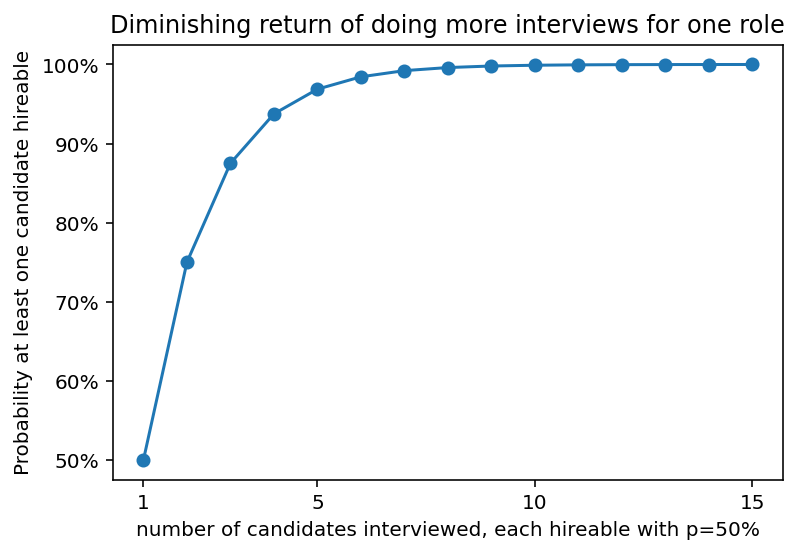

[(1, 0.5), (2, 0.75), (3, 0.875), (4, 0.9375), (5, 0.96875), (6, 0.984375)]

In [235]:
p_hire = 0.5
probs = [1 - (1 - p_hire)**panel_n for panel_n in range(1, 15 + 1)]
plt.plot(probs, '-o')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=0, xmax=1))
plt.xticks([0, 4, 9, 14], [1, 5, 10, 15])
plt.xlabel('number of candidates interviewed, each hireable with p=50%')
plt.ylabel(f'Probability at least one candidate hireable')
plt.title('Diminishing return of doing more interviews for one role')
plt.show()
list(zip(range(1, 7), probs))

This seems to accord with the intuitition that 4 to 6 candidates is "about the right number" of people to interview for one role, or at least that you probably don't need to interview many more candidates than six or seven.

Of course this neglects additional knowledge you could have about how hireable individuals really are. If you already know you have two great candidates, then maybe you don't have to interview more. If your candidate pool is particularly weak, maybe it takes many more interviews to find someone (though also, you might try to improve pre-interview filtering).

The simple probabilistic model here is not correct, but may be useful. What does it imply for how many people you should interview when trying to fill multiple roles from the same group of candidates?

In [237]:
def min_candidates(roles_n, p_hire=0.5, confidence=0.9):
    """Number of people to interview to ensure confidence of finding roles_n hireable"""
    candidates_n = roles_n
    while True:
        if 1 - scipy.stats.binom(n=candidates_n, p=p_hire).cdf(roles_n - 1) >= confidence:
            return candidates_n
        candidates_n += 1

In [239]:
recs = pd.DataFrame([(roles_n,
                      min_candidates(roles_n, confidence=0.9),
                      min_candidates(roles_n, confidence=0.98))
                     for roles_n in range(1, 101)],
                    columns=['number of roles to fill',
                             'interview from this many',
                             'to this many candidates'])
recs

,number of roles to fill,interview from this many,to this many candidates
0,1,4,6
1,2,7,9
2,3,9,12
3,4,12,15
4,5,14,18
...,...,...,...
95,96,210,222
96,97,212,224
97,98,214,226
98,99,216,228


In [240]:
recs.to_csv('recommendations.csv', index=False)
# available at:
# https://docs.google.com/spreadsheets/d/1_yGBNo2ZlDmfzOjRbXp2hiySZm-5sK9KztqT509VCC8/